In [1]:
##################################################################################################################
# 
#   Seaborn learning rate visualization example
#
#   Author: Philip Bramwell
#   Date: 20 December
# 
#   goal: 
#         * Visualize the costfunction and learning rate
#
#   Index: 
#         1. Libary Imports
#         2. Variable Definition and load Dataset
#         3. Function Defintion
#         4. Visualize Datapoints
#         5. Visualize costfunction
#
##################################################################################################################

## Imports

In [2]:
import pennylane as qml 
from pennylane import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Variables

In [3]:
# creates randomized linearly correlated datapoints 

x_values = np.random.uniform(0, 1, 500)
y_values = x_values + np.random.normal(1, 0.1, 500)

weights = [0.0, 0.0]

optimizer = qml.GradientDescentOptimizer(0.01)
optimization_steps = 10000

# Functions

In [4]:
def y_prediction(weights):
    return weights[0] * x_values + weights[1]

# mean squared error
def costfunction(weights):
    y_predicted = y_prediction(weights)
    return np.mean((y_values - y_predicted) ** 2)

# Visualize Datapoints

<AxesSubplot:>

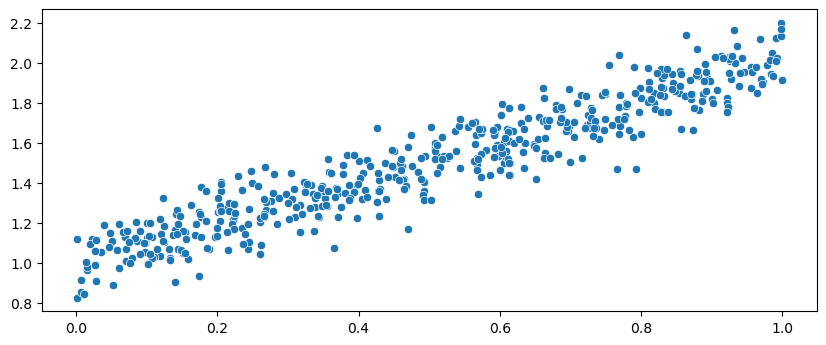

In [5]:
plt.figure(figsize=(10, 4), dpi=100)
sns.scatterplot(x=x_values, y=y_values)

## Visualize the Costfunction

(1.0130947179467242, 0.9936885530002911, tensor(0.00973901, requires_grad=True))
(1.013094869785224, 0.993688471179177, tensor(0.00973901, requires_grad=True))
(1.013095003689502, 0.9936883990222657, tensor(0.00973901, requires_grad=True))
(1.0130951217778386, 0.9936883353880807, tensor(0.00973901, requires_grad=True))
(1.0130952259183137, 0.9936882792699704, tensor(0.00973901, requires_grad=True))
(1.0130953177583626, 0.9936882297801827, tensor(0.00973901, requires_grad=True))
(1.0130953987508344, 0.9936881861358218, tensor(0.00973901, requires_grad=True))
(1.013095470176978, 0.993688147646462, tensor(0.00973901, requires_grad=True))
(1.0130955331667093, 0.9936881137032267, tensor(0.00973901, requires_grad=True))
(1.0130955887164848, 0.9936880837691554, tensor(0.00973901, requires_grad=True))
(1.0130956377050655, 0.9936880573707109, tensor(0.00973901, requires_grad=True))
(1.0130956809074185, 0.9936880340902866, tensor(0.00973901, requires_grad=True))
(1.0130957190069774, 0.9936880135

AttributeError: 'list' object has no attribute 'get_array'

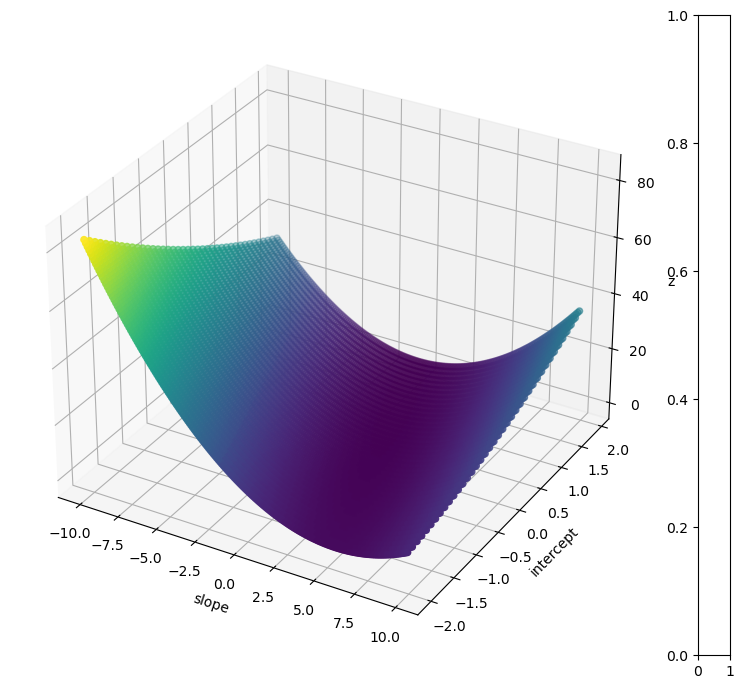

In [7]:
# %matplotlib widget

fig = plt.figure(figsize=(12, 8), dpi=100)

ax = fig.add_axes([0, 0, 0.8, 0.8], projection='3d')
ax.set_xlabel('slope')
ax.set_ylabel('intercept')
ax.set_zlabel('z')

slope_list = []
intercept_list = []
mse_list = []
weight_list_slope = []
weight_list_intercept = []
weight_list_cost = []


for step in range(optimization_steps):
    weights = optimizer.step(costfunction, weights)
    
    if step % 100 == 0:
        weight_list_slope.append(weights[0])       
        weight_list_intercept.append(weights[1])       
        
        costfunct_value = costfunction([weights[0], weights[1]])
                                       
        weight_list_cost.append(costfunct_value)
        print(f'{weights[0], weights[1], costfunction(weights)}')

for m in range(-100, 100):
    for b in range(-20, 20):
        slope_list.append(m / 10)
        intercept_list.append(b / 10)
        mse = costfunction([m / 10, b / 10])
        mse_list.append(mse)
        
ax.scatter(slope_list, intercept_list, mse_list, c=mse_list)
fig.colorbar(mse_list)
ax.scatter(weight_list_slope, weight_list_intercept, weight_list_cost, c='r', s=500)